In [1]:
import pandas as pd


Read the data as dataframe.The processing of data is done as a dataframe for convenience in handling

In [2]:
import numpy as np

Numpy package is used to perform the mathematical comutations.

In [3]:
import matplotlib.pyplot as plt

It is used for the data visuliztion(especially used for customization like figure size,width,breadth etc).

In [4]:
import seaborn as sns

It is also used for data visualization especially for graph construction. 

In [5]:
import scipy.stats as stats

Used for statistical computation.

In [6]:
data=pd.read_csv('bank-full.csv')

To read the data we use pd.read_csv

In [7]:
data.shape

(45211, 17)

To find the number of columns and rows in data,we use shape function

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Displays the datatype of each attributes in the data set

In [9]:
data.isnull().values.any()

np.False_

To check the presence of the missing values

In [10]:
data.describe( )

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Checking the discriptive statistics of data.
To find the 5 number summary smallest,largest,q1,q2,q3 of the numerical attributes are measured

In [11]:
print("Numeric column of dataset")
data_num=data.describe().columns
print(data_num)

Numeric column of dataset
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [12]:
print("categorical")
data_cat=data.describe(include=[object]).columns
print(data_cat)

categorical
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')


Displays the categorical column name

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

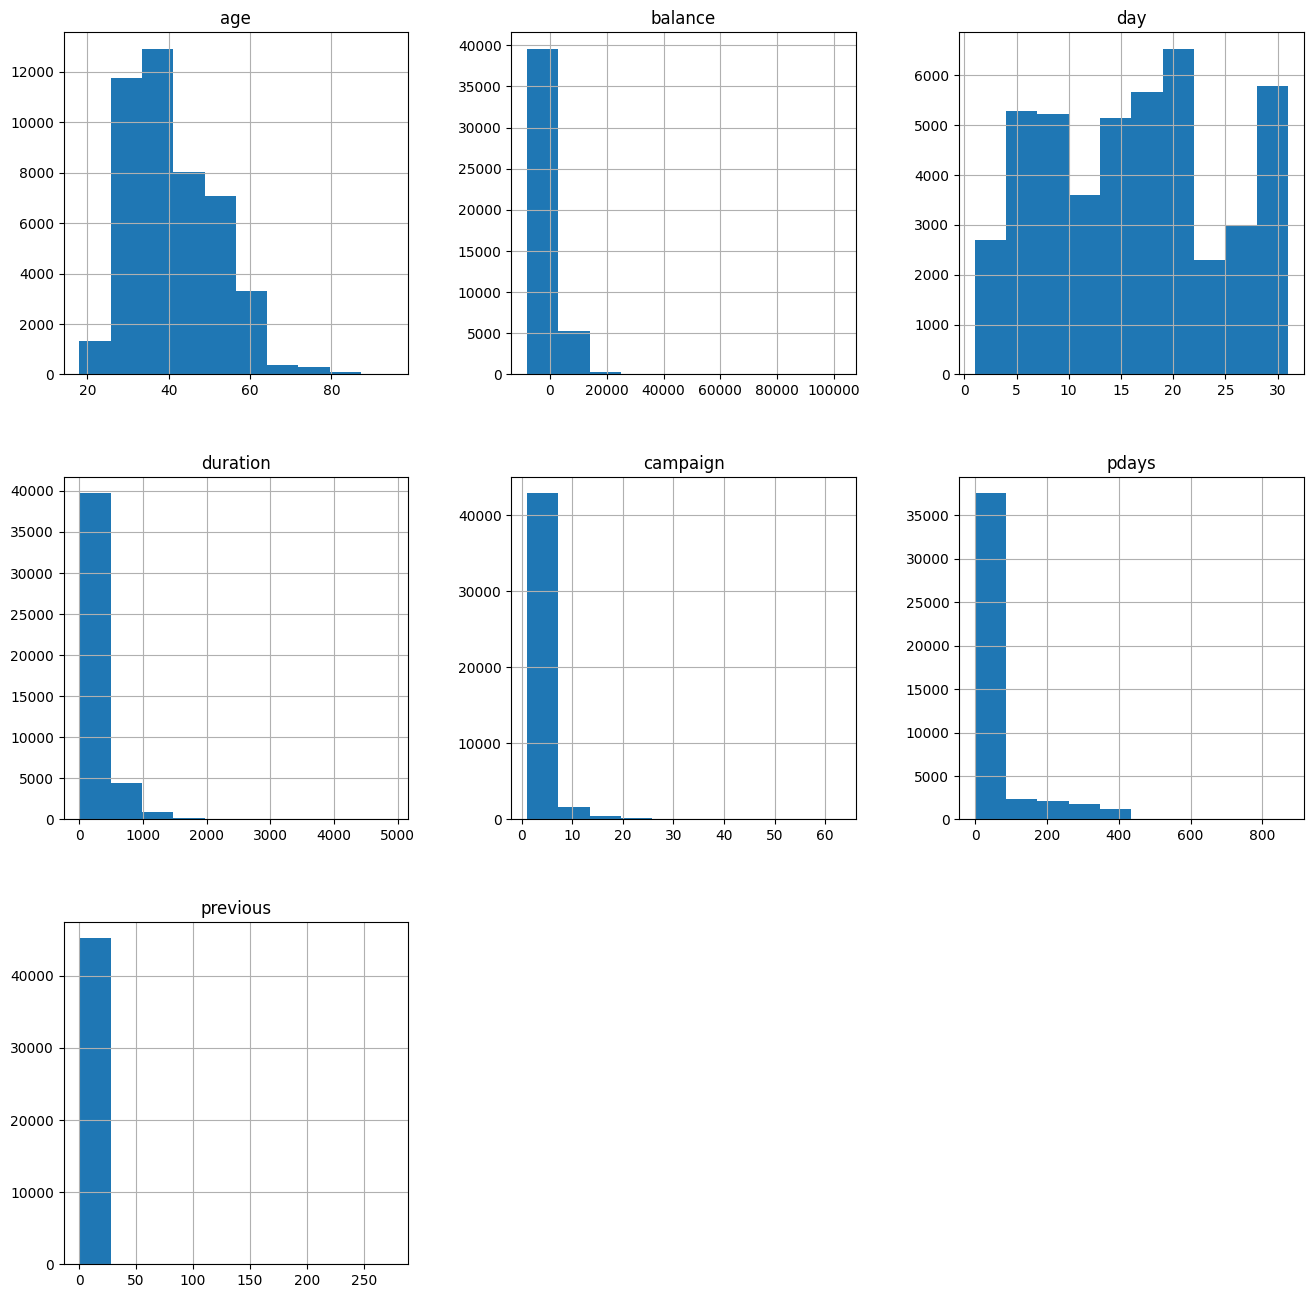

In [13]:
#visualizing numeric attribute
data.hist(column=data_num,figsize=(16,16))

Histagram of all numeric columns of data visualized
Age: Majority of customer in the data are from age of 20 to 40
Balance: Majority customers balance is low
Average campaign is 1-8.

<Axes: xlabel='Target', ylabel='age'>

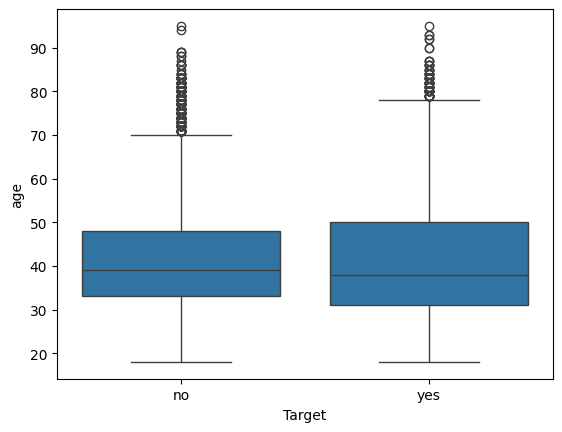

In [14]:
sns.boxplot(data=data,x='Target',y='age')

The median age for both the groups(subscribed and not subscribed) are around 37 t0 40.
There is an overlapping for ages for both groups of target which indicates that age is not a good indicator to predict which customer will subscribed or not subscribed.

<Axes: xlabel='Target', ylabel='campaign'>

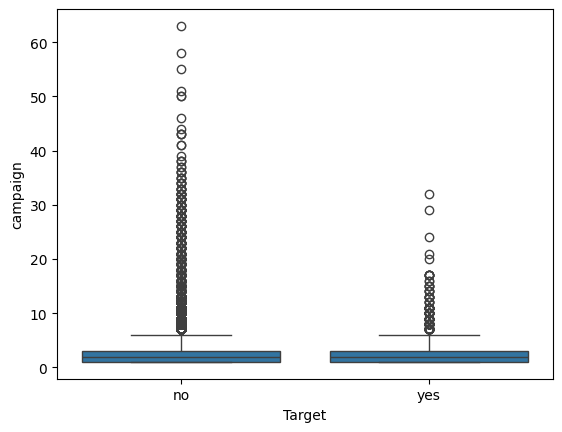

In [15]:
#target and campaign
#target and duration
#target and pdays
sns.boxplot(data=data,x='Target',y='campaign')

Here also we can't interpret because both have the same meadian vaalues

<Axes: xlabel='Target', ylabel='duration'>

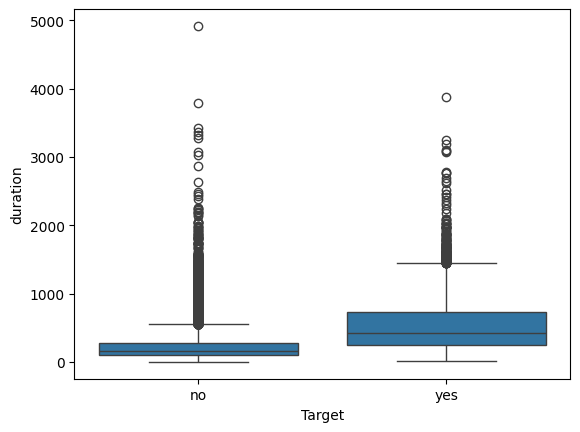

In [16]:
sns.boxplot(data=data,x='Target',y='duration')

From the plot above its clear that duration can be useful for predicting the target variables

<Axes: xlabel='Target', ylabel='pdays'>

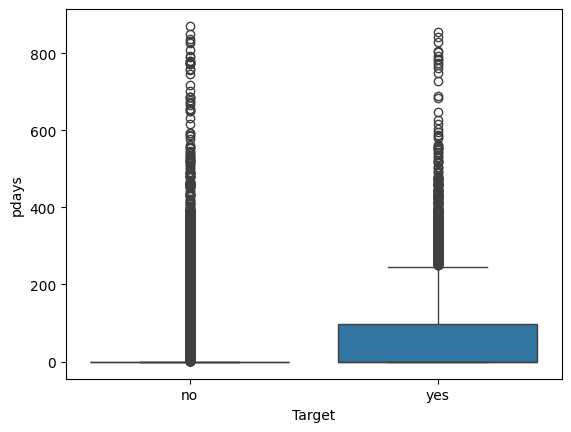

In [17]:
sns.boxplot(data=data,x='Target',y='pdays')

From the plot above its inferred more frequent contact to customers,more the subscription to term deposit

<Axes: xlabel='Target', ylabel='duration'>

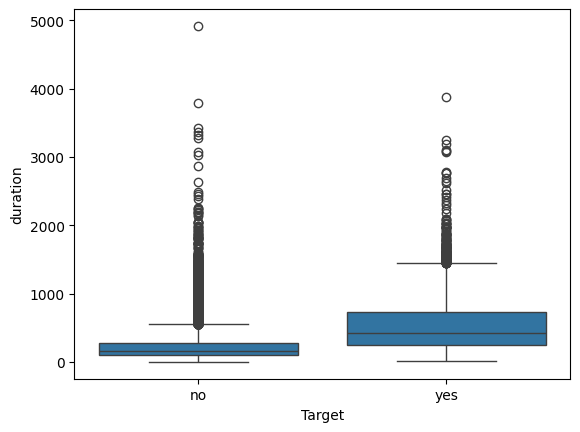

In [18]:
sns.boxplot(data=data,x='Target',y='duration')

In [19]:
data['previous'].value_counts()

previous
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
18         6
22         6
24         5
27         5
29         4
21         4
25         4
30         3
26         2
37         2
28         2
38         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64

<Axes: xlabel='Target', ylabel='day'>

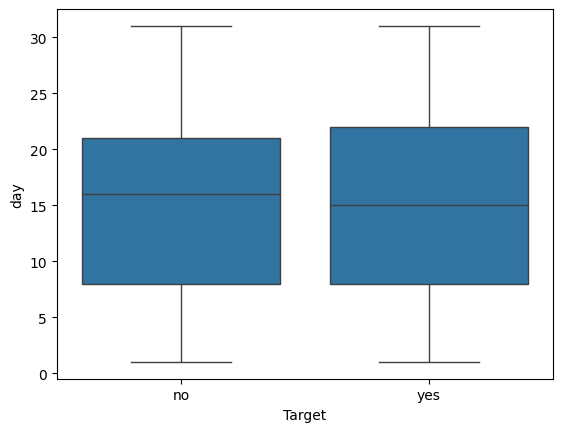

In [20]:
sns.boxplot(data=data,x='Target',y='day')

<Axes: >

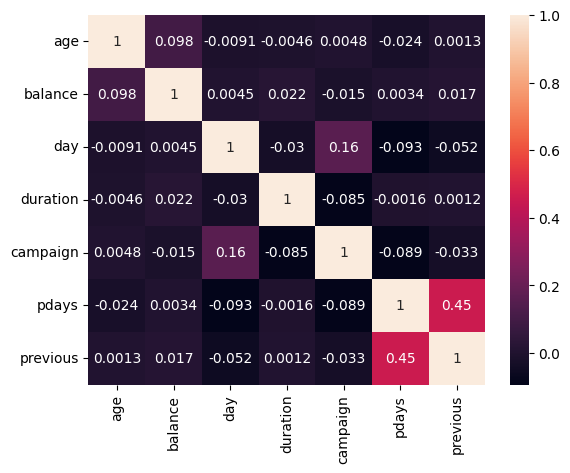

In [21]:
#To check the linear associativity(can't find linear associativity for categorical data.So we find only the linear associativity b/n numerical column
#Because our dataset contain both numeric and categorical data,so in order to seperate them,we cretae one more variable called num_data

num_data=data[data_num]
correlation=num_data.corr()
sns.heatmap(correlation,annot=True)

slight correlation b/n previous and pdats observed

C:\Users\raksh\AppData\Local\Temp\ipykernel_15696\2606549150.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


[Text(0, 0, 'management'),
 Text(1, 0, 'technician'),
 Text(2, 0, 'entrepreneur'),
 Text(3, 0, 'blue-collar'),
 Text(4, 0, 'unknown'),
 Text(5, 0, 'retired'),
 Text(6, 0, 'admin.'),
 Text(7, 0, 'services'),
 Text(8, 0, 'self-employed'),
 Text(9, 0, 'unemployed'),
 Text(10, 0, 'housemaid'),
 Text(11, 0, 'student')]

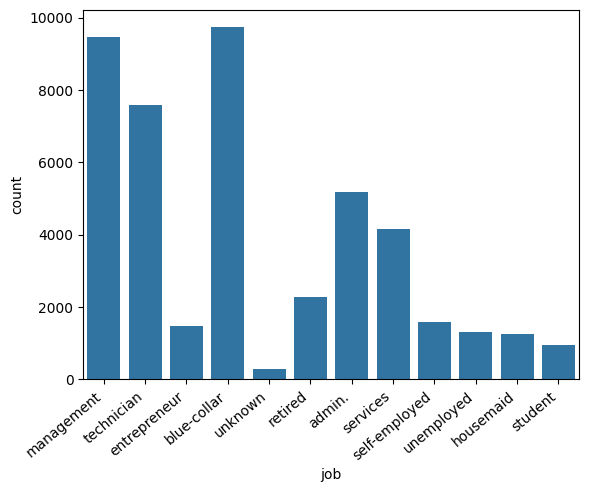

In [22]:
#visualizing categorical variables
ax=sns.countplot(x='job',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

C:\Users\raksh\AppData\Local\Temp\ipykernel_15696\3359980795.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


[Text(0, 0, 'management'),
 Text(1, 0, 'technician'),
 Text(2, 0, 'entrepreneur'),
 Text(3, 0, 'blue-collar'),
 Text(4, 0, 'unknown'),
 Text(5, 0, 'retired'),
 Text(6, 0, 'admin.'),
 Text(7, 0, 'services'),
 Text(8, 0, 'self-employed'),
 Text(9, 0, 'unemployed'),
 Text(10, 0, 'housemaid'),
 Text(11, 0, 'student')]

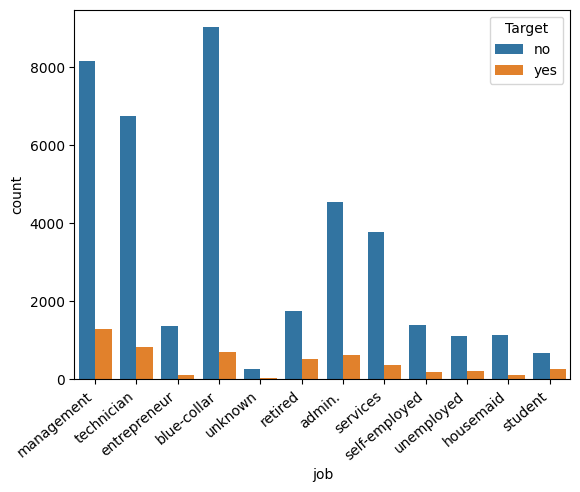

In [23]:
ax=sns.countplot(x='job',data=data,hue='Target')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

From the above plot customers from management has the highest rate of subscribing the loan

C:\Users\raksh\AppData\Local\Temp\ipykernel_15696\301453239.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


[Text(0, 0, 'married'), Text(1, 0, 'single'), Text(2, 0, 'divorced')]

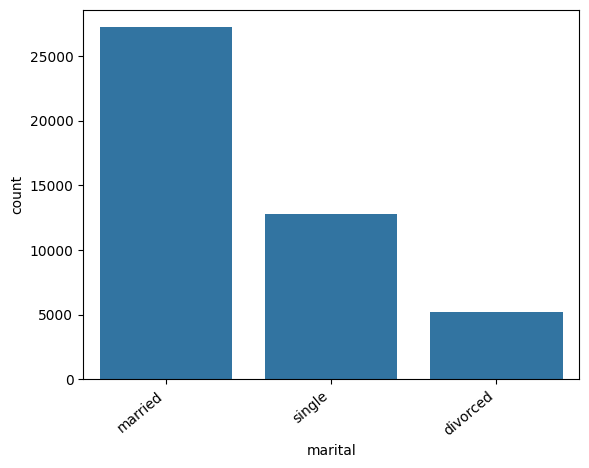

In [24]:
ax=sns.countplot(x='marital',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

C:\Users\raksh\AppData\Local\Temp\ipykernel_15696\1201232250.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


[Text(0, 0, 'married'), Text(1, 0, 'single'), Text(2, 0, 'divorced')]

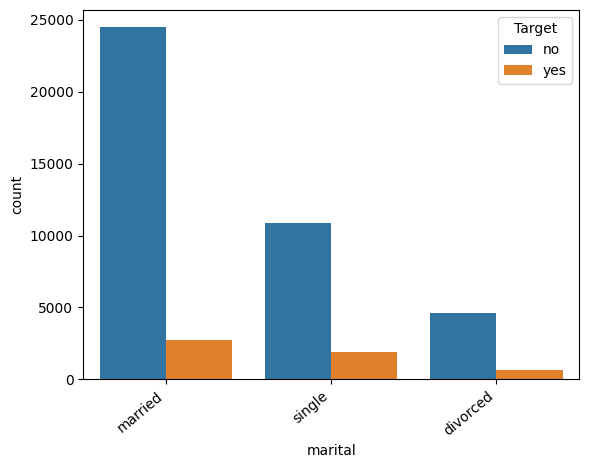

In [25]:
ax=sns.countplot(x='marital',data=data,hue='Target')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

Married customers subscribing loan are slightly more in number than single customers.

C:\Users\raksh\AppData\Local\Temp\ipykernel_15696\3076863539.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


[Text(0, 0, 'tertiary'),
 Text(1, 0, 'secondary'),
 Text(2, 0, 'unknown'),
 Text(3, 0, 'primary')]

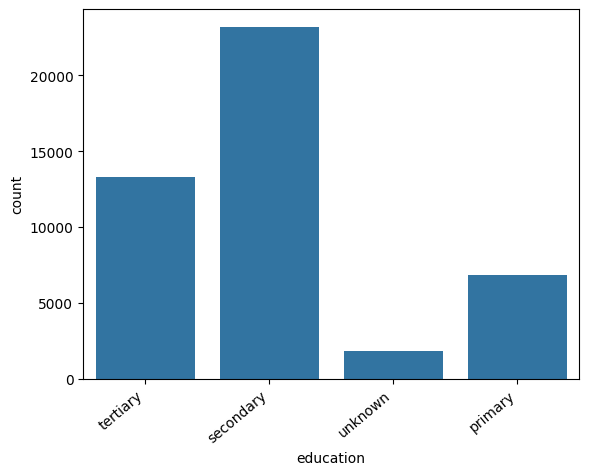

In [26]:
ax=sns.countplot(x='education',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

C:\Users\raksh\AppData\Local\Temp\ipykernel_15696\1698790210.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


[Text(0, 0, 'tertiary'),
 Text(1, 0, 'secondary'),
 Text(2, 0, 'unknown'),
 Text(3, 0, 'primary')]

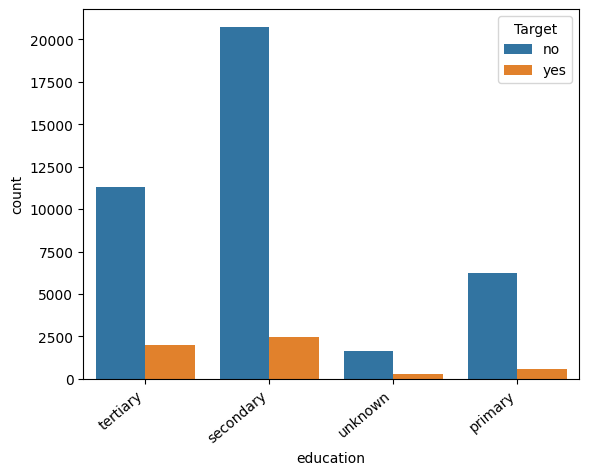

In [27]:
ax=sns.countplot(x='education',data=data,hue='Target')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

Majority customers with seconadry eduaction is subscribing the loan

In [28]:
#default
#housing
#loan
#contact
#month
#poutcome

C:\Users\raksh\AppData\Local\Temp\ipykernel_15696\650475195.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


[Text(0, 0, 'no'), Text(1, 0, 'yes')]

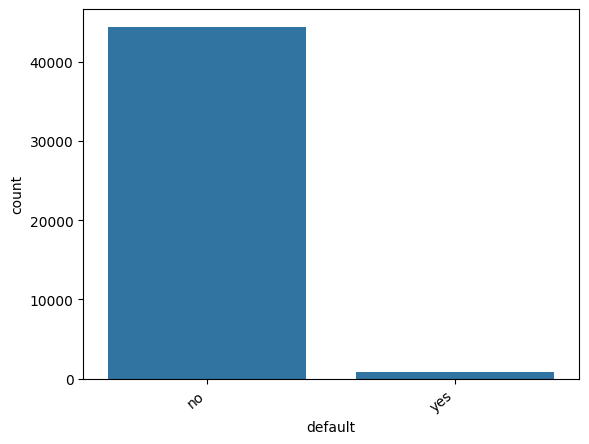

In [29]:
ax=sns.countplot(x='default',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

C:\Users\raksh\AppData\Local\Temp\ipykernel_15696\768146139.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


[Text(0, 0, 'no'), Text(1, 0, 'yes')]

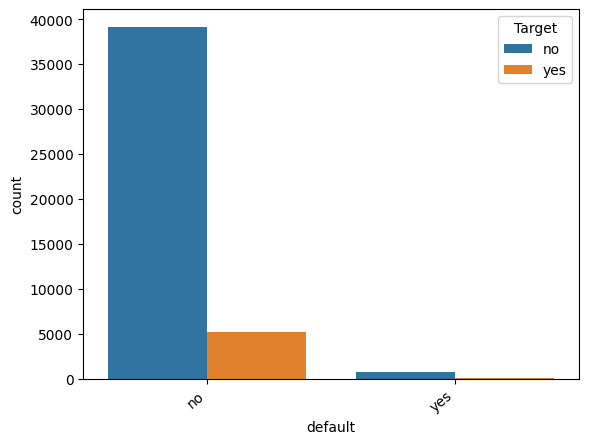

In [30]:
ax=sns.countplot(x='default',data=data,hue='Target')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

In [31]:
 #Most of the non defaulter are subscribing the loan

C:\Users\raksh\AppData\Local\Temp\ipykernel_15696\616502516.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


[Text(0, 0, 'yes'), Text(1, 0, 'no')]

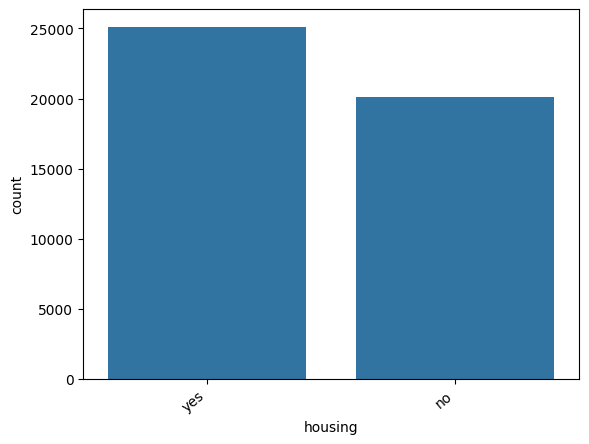

In [32]:
ax=sns.countplot(x='housing',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

C:\Users\raksh\AppData\Local\Temp\ipykernel_15696\1983863563.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


[Text(0, 0, 'yes'), Text(1, 0, 'no')]

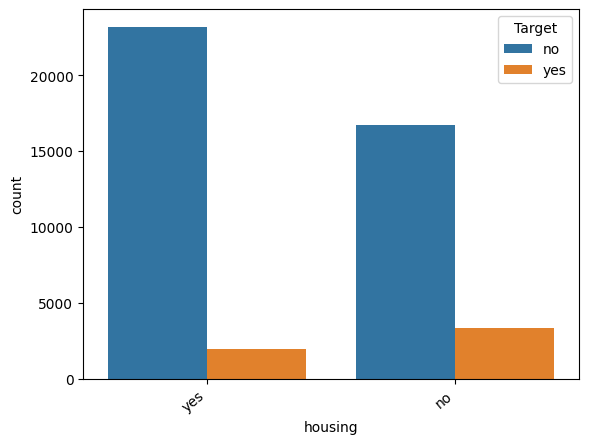

In [33]:
ax=sns.countplot(x='housing',data=data,hue='Target')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

In [34]:
#Most customer without housing loan are subscribing the loan

C:\Users\raksh\AppData\Local\Temp\ipykernel_15696\279828962.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


[Text(0, 0, 'no'), Text(1, 0, 'yes')]

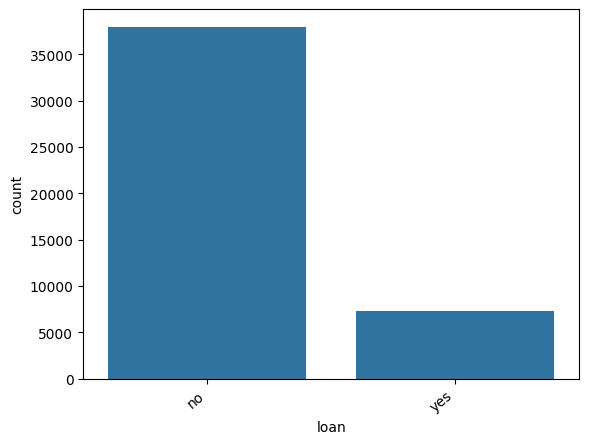

In [35]:
ax=sns.countplot(x='loan',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

C:\Users\raksh\AppData\Local\Temp\ipykernel_15696\1268045193.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


[Text(0, 0, 'no'), Text(1, 0, 'yes')]

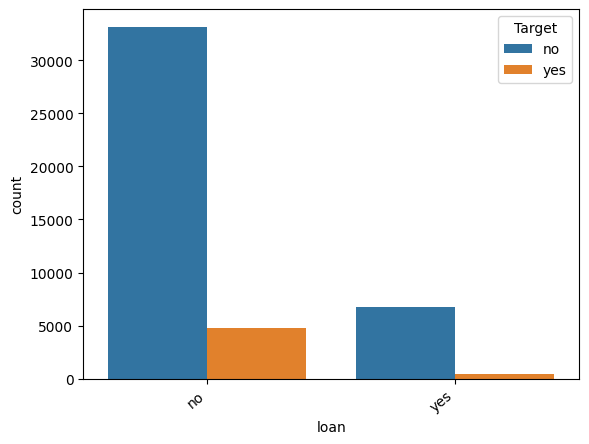

In [36]:
ax=sns.countplot(x='loan',data=data,hue='Target')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

In [37]:
#most customer without personal loan are subscribing more

C:\Users\raksh\AppData\Local\Temp\ipykernel_15696\1516960824.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


[Text(0, 0, 'unknown'), Text(1, 0, 'cellular'), Text(2, 0, 'telephone')]

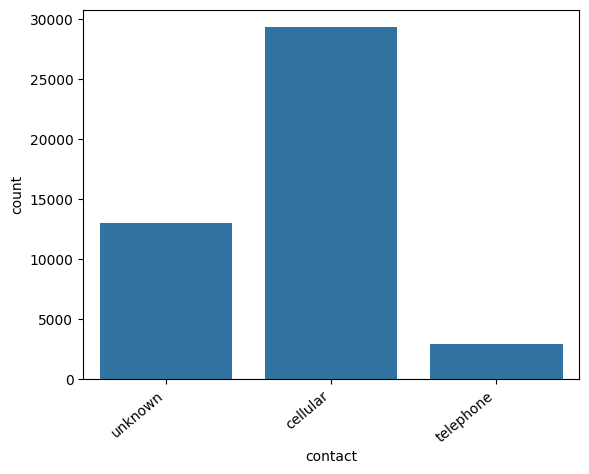

In [38]:
ax=sns.countplot(x='contact',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

C:\Users\raksh\AppData\Local\Temp\ipykernel_15696\1913609534.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


[Text(0, 0, 'unknown'), Text(1, 0, 'cellular'), Text(2, 0, 'telephone')]

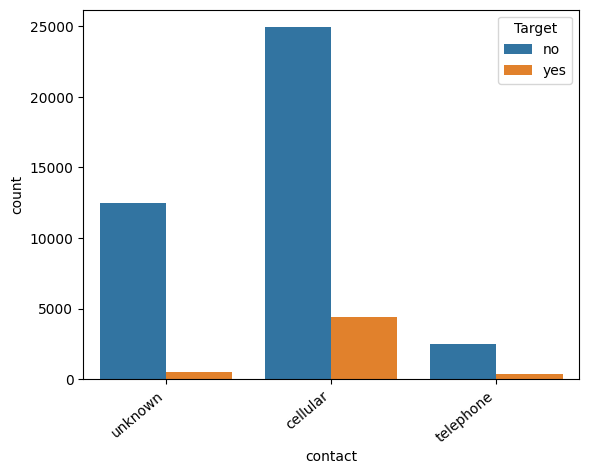

In [39]:
ax=sns.countplot(x='contact',data=data,hue='Target')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

In [40]:
#Most customer contacted through cellular type is subscribing for loan

C:\Users\raksh\AppData\Local\Temp\ipykernel_15696\190831110.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


[Text(0, 0, 'may'),
 Text(1, 0, 'jun'),
 Text(2, 0, 'jul'),
 Text(3, 0, 'aug'),
 Text(4, 0, 'oct'),
 Text(5, 0, 'nov'),
 Text(6, 0, 'dec'),
 Text(7, 0, 'jan'),
 Text(8, 0, 'feb'),
 Text(9, 0, 'mar'),
 Text(10, 0, 'apr'),
 Text(11, 0, 'sep')]

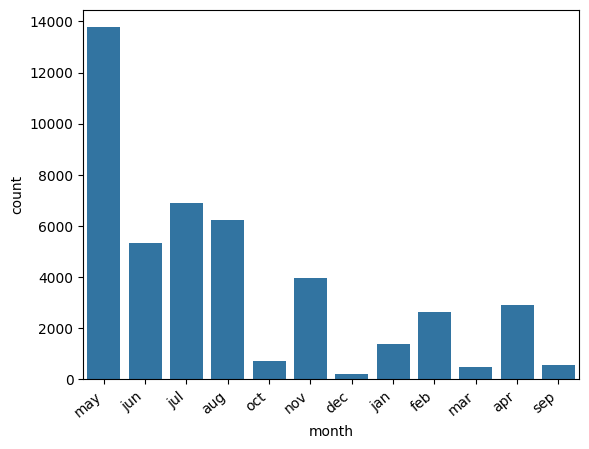

In [41]:
ax=sns.countplot(x='month',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

C:\Users\raksh\AppData\Local\Temp\ipykernel_15696\2877296246.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


[Text(0, 0, 'may'),
 Text(1, 0, 'jun'),
 Text(2, 0, 'jul'),
 Text(3, 0, 'aug'),
 Text(4, 0, 'oct'),
 Text(5, 0, 'nov'),
 Text(6, 0, 'dec'),
 Text(7, 0, 'jan'),
 Text(8, 0, 'feb'),
 Text(9, 0, 'mar'),
 Text(10, 0, 'apr'),
 Text(11, 0, 'sep')]

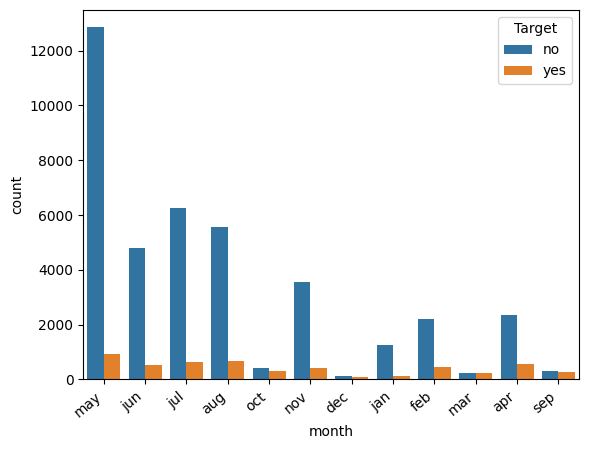

In [42]:
ax=sns.countplot(x='month',data=data,hue='Target')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

In [43]:
#Most of the customer contacted in the month may is subscribing more

C:\Users\raksh\AppData\Local\Temp\ipykernel_15696\56233144.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


[Text(0, 0, 'unknown'),
 Text(1, 0, 'failure'),
 Text(2, 0, 'other'),
 Text(3, 0, 'success')]

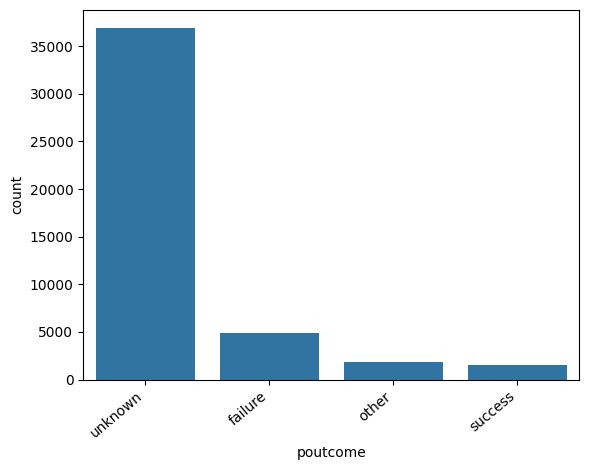

In [44]:
ax=sns.countplot(x='poutcome',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

C:\Users\raksh\AppData\Local\Temp\ipykernel_15696\3056905871.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


[Text(0, 0, 'unknown'),
 Text(1, 0, 'failure'),
 Text(2, 0, 'other'),
 Text(3, 0, 'success')]

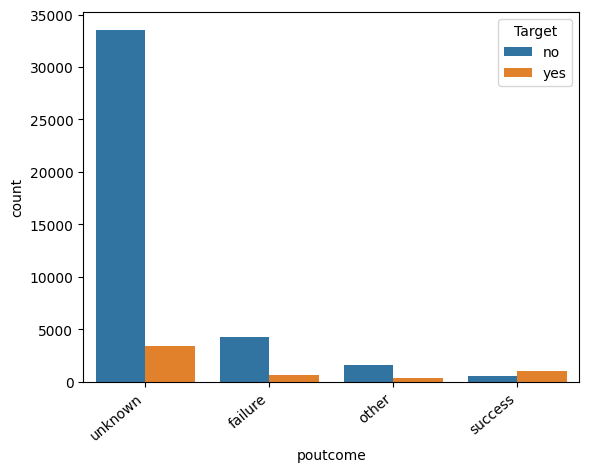

In [45]:
ax=sns.countplot(x='poutcome',data=data,hue='Target')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')

In [46]:
#Data preprocessing

In [47]:
data.isnull().values.any()

np.False_

In [48]:
#Above result to conclude no NAN present in the dataset

In [49]:
#categoricall variables are identified data

#one hot enconding---increase the no of column (object to bool)
col=data.select_dtypes(include=['object']).columns

In [50]:
data=pd.concat([data,pd.get_dummies(data[col])],axis=1)

In [51]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Target_no,Target_yes
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,True,False,False,False,False,False,False,True,True,False
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,True,False,False,False,False,False,False,True,True,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,True,False,False,False,False,False,False,True,True,False
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,True,False,False,False,False,False,False,True,True,False
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,True,False,False,False,False,False,False,True,True,False


In [52]:
data.shape

(45211, 63)

In [53]:
data=data.drop(['job','marital','education','default','housing','loan','contact','month','poutcome','Target','duration'],axis=1)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   campaign             45211 non-null  int64
 4   pdays                45211 non-null  int64
 5   previous             45211 non-null  int64
 6   job_admin.           45211 non-null  bool 
 7   job_blue-collar      45211 non-null  bool 
 8   job_entrepreneur     45211 non-null  bool 
 9   job_housemaid        45211 non-null  bool 
 10  job_management       45211 non-null  bool 
 11  job_retired          45211 non-null  bool 
 12  job_self-employed    45211 non-null  bool 
 13  job_services         45211 non-null  bool 
 14  job_student          45211 non-null  bool 
 15  job_technician       45211 non-null  bool 
 16  job_unemployed       4

In [55]:
#Do Normalization
from sklearn import preprocessing
#preprocessing from sklearn supports different preprocessing task such as imputation,scaling,etc.

In [56]:
min_max_scaled=preprocessing.MinMaxScaler()

In [57]:
scaled_data=pd.DataFrame(min_max_scaled.fit_transform(data),columns=data.columns)

In [58]:
y=scaled_data.Target_yes

In [80]:
x=scaled_data.drop(['Target_yes','Target_no'],axis=1)

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [83]:
#Seperated the data as dependent and independent variables.Seperated data as train and test set

In [84]:
from sklearn import metrics
#Apply Logistic Regression
from sklearn.linear_model import LogisticRegression

In [85]:
#Instantiate the class
logistic_model=LogisticRegression()

In [86]:
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [66]:
print("Accuracy of Logistic Regression model:",logistic_model.score(x_test,y_test))

Accuracy of Logistic Regression model: 0.8942789737540549


In [67]:
#to predict the values
y_predict=logistic_model.predict(x_test)

In [68]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_predict)

In [69]:
print(cm)

[[11851   162]
 [ 1272   279]]


In [70]:
tp=11851
tn=279
fp=1272
fn=162

In [71]:
print("Precision=",(tp/(tp+fp)))

Precision= 0.9030709441438696


In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

NameError: name 'X' is not defined

In [74]:
knn_model=KNeighborsClassifier(n_neighbors=7,weights='distance')

In [77]:
knn_model.fit(x_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [31647, 13564]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model1=RandomForestClassifier(n_estimators=25,random_state=1,max_features=10)

In [ ]:
model1.fit(x_train,y_train)

In [ ]:
print("Accuracy of Random Forest:",(tp+tn)/(tp+tn+fp+fn))

In [ ]:
feature_imp=f_model1.feature_importances_

In [ ]:
features=np.argsort(feature_imp)[::-1][:10]

In [ ]:
plt.title("Feature importances based on Random Forest")
plt.bar(range(len(features)),feature_imp[features])
plt.xticks(range(len(features)),columns[features],rotation=60)